In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/endothelia_subset/DGE_'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read master table

In [3]:
## directory paths
master_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_correlation_tables/220114_MASTER_dge_correlation_table.csv'

In [4]:
## read master table
master = pd.read_csv(master_dir, index_col=0)
master.head(5)

,Alveolar_Epithelium_invivo_log2FC,Alveolar_Epithelium_invivo_pval_adj,Alveolar_Epithelium_invivo_pct_healthy,Alveolar_Epithelium_invivo_pct_ILD,Alveolar_Epithelium_exvivo_log2FC,Alveolar_Epithelium_exvivo_pval_adj,Alveolar_Epithelium_exvivo_pct_CC,Alveolar_Epithelium_exvivo_pct_FC,Alveolar_Epithelium_CMP4_log2FC,Alveolar_Epithelium_CMP4_pval_adj,...,NK_cells_exvivo_pct_CC,NK_cells_exvivo_pct_FC,NK_cells_CMP4_log2FC,NK_cells_CMP4_pval_adj,NK_cells_CMP4_pct_CC,NK_cells_CMP4_pct_FC_CMP4,NK_cells_Nintedanib_log2FC,NK_cells_Nintedanib_pval_adj,NK_cells_Nintedanib_pct_CC,NK_cells_Nintedanib_pct_FC_Nintedanib
gene,,,,,,,,,,,,,,,,,,,,,
GPX1,10.0,0.0,0.208328,0.233239,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAPRT,10.0,0.0,0.056900,0.035651,-0.775898,0.000006,0.193662,0.151819,-1.067108,6.361869e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRYBG3,10.0,0.0,0.045819,0.050550,-0.267367,0.066029,0.268486,0.260979,-0.275646,3.066237e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIFA,10.0,0.0,0.166655,0.089571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LUC7L2,10.0,0.0,0.137390,0.115999,NaN,NaN,NaN,NaN,-0.645198,3.971449e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,1.510993,0.000156,0.016423,0.077441


In [5]:
endo_master = master[['vascular_EC_invivo_log2FC', 'vascular_EC_invivo_pval_adj',
                         'vascular_EC_exvivo_log2FC', 'vascular_EC_exvivo_pval_adj']].dropna()

### Visualize gene expression changes in vascular_EC

In [6]:
genes = ['CAVIN1','CAVIN2','CAVIN3','EMP1','PDLIM1','MYOF','MPZL2','GMDS','FILIP1','CFI','MYO1D','MYO5C','MYC',
         'CD36','NDNF','TPM1','ID1','SPOCK2','SMAD7','ERRFI1','IL1RL1','AFF3','SMAD6','RASA4','MEIS1','IL18R1','HIF3A']
len(genes)

27

In [7]:
endo_master = endo_master[(endo_master['vascular_EC_invivo_pval_adj'] < 0.05) & (endo_master['vascular_EC_exvivo_pval_adj'] < 0.05)]

In [8]:
endo_master_diverging_1 = endo_master[(endo_master['vascular_EC_invivo_log2FC'] > 0.5) & (endo_master['vascular_EC_exvivo_log2FC'] < -0.5)]
endo_master_diverging_1.iloc[50:100,]

,vascular_EC_invivo_log2FC,vascular_EC_invivo_pval_adj,vascular_EC_exvivo_log2FC,vascular_EC_exvivo_pval_adj
gene,,,,
PRDX4,0.693513,5.521926e-13,-0.597570,0.000000e+00
PAICS,0.661858,1.565333e-06,-0.640636,2.768355e-06
ASS1,0.524612,0.000000e+00,-1.346276,1.626747e-02
MYO1D,10.000000,0.000000e+00,-1.318194,0.000000e+00
ANKRD29,10.000000,0.000000e+00,-10.000000,0.000000e+00
MRTO4,0.917589,1.484588e-13,-0.604190,1.104314e-09
ATP8B1,0.911170,0.000000e+00,-0.610169,2.116761e-12
EIF6,10.000000,0.000000e+00,-0.534780,2.718120e-14
BZW2,1.312970,0.000000e+00,-0.553813,5.109461e-06


In [9]:
endo_master_diverging_2 = endo_master[(endo_master['vascular_EC_invivo_log2FC'] < -0.5) & (endo_master['vascular_EC_exvivo_log2FC'] > 0.5)]
endo_master_diverging_2.iloc[50:100,]

,vascular_EC_invivo_log2FC,vascular_EC_invivo_pval_adj,vascular_EC_exvivo_log2FC,vascular_EC_exvivo_pval_adj
gene,,,,
HERC3,-0.758210,3.482496e-12,10.000000,0.000000e+00
EMSY,-10.000000,0.000000e+00,1.031453,3.728394e-06
SMAD6,-0.743021,0.000000e+00,2.536334,0.000000e+00
DISP1,-0.676201,3.229224e-10,1.213357,7.257490e-03
ARHGAP6,-1.551962,0.000000e+00,2.160932,0.000000e+00
IGF1R,-0.614298,4.557298e-14,0.664053,2.125524e-09
MEIS1,-1.019136,0.000000e+00,2.233336,5.131108e-03
DOC2B,-10.000000,0.000000e+00,0.626064,2.576474e-04
RASA4,-10.000000,0.000000e+00,3.123027,2.707055e-10


In [10]:
endo_master_genes = endo_master.loc[genes,:]

In [11]:
endo_master_genes = endo_master_genes.sort_values(by = ['vascular_EC_invivo_log2FC','vascular_EC_exvivo_log2FC'], ascending = [False,False])

In [12]:
#endo_master.to_csv('/home/niklas/220710_fibs_diverging.csv', index = True)

In [13]:
endo_master_genes.shape

(27, 4)

In [14]:
invivo = endo_master_genes[['vascular_EC_invivo_log2FC']]
invivo[invivo < -3] = -3
invivo[invivo > 3] = 3
invivo['gene'] = invivo.index
exvivo = endo_master_genes[['vascular_EC_exvivo_log2FC']]
exvivo[exvivo < -3] = -3
exvivo[exvivo > 3] = 3
exvivo['gene'] = exvivo.index

/tmp/ipykernel_2191115/1281275020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invivo[invivo < -3] = -3
/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/tmp/ipykernel_2191115/1281275020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

###  Visualize invivo and exvivo log2FC in same plot

In [15]:
invivo = invivo[['vascular_EC_invivo_log2FC','gene']]
invivo.rename(columns = {'vascular_EC_invivo_log2FC':'log2FC'}, inplace = True)
invivo['condition'] = 'invivo - PF'

In [16]:
exvivo = exvivo[['vascular_EC_exvivo_log2FC','gene']]
exvivo.rename(columns = {'vascular_EC_exvivo_log2FC':'log2FC'}, inplace = True)
exvivo['condition'] = 'exvivo - FC'

In [17]:
conserved = pd.concat([invivo, exvivo], axis=0)

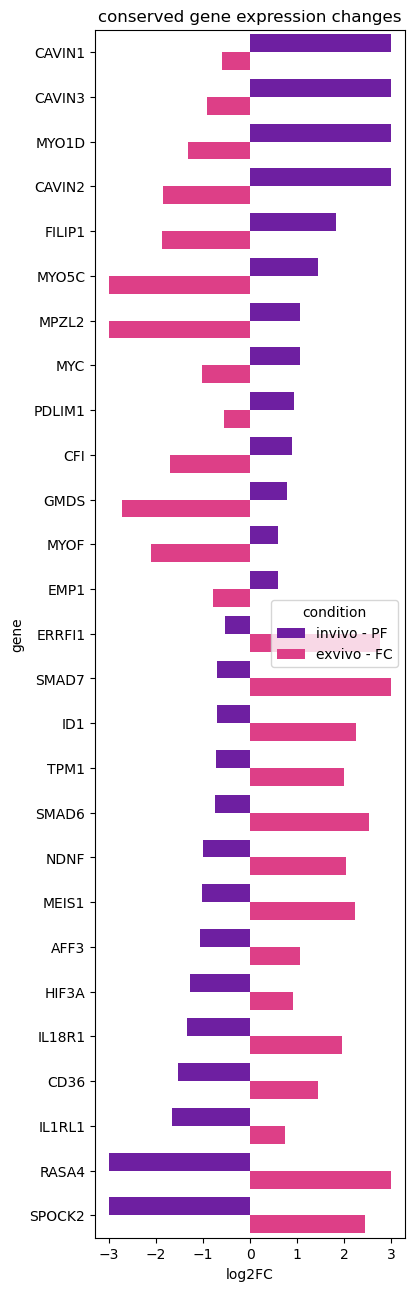

In [18]:
sb.barplot(data = conserved,
           x = 'log2FC',
           y = 'gene',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 16), dpi = 100).gca()
          ).set(title='conserved gene expression changes',
                xlabel = 'log2FC',
                ylabel = 'gene'
               )
plt.savefig(fig_dir + 'barplot_vascular_EC_diverging_DE_genes.pdf')
plt.show()